# Traversal Distance Dataset Analysis

In [1]:
# standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# local classes
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
os.chdir('leaf_data')

### Importing lead dataset at Pandas DataFrame. 

In [2]:
df = pd.read_csv('maracuya.csv')
df = df.drop(columns=['plant', 'heteroblasty', 'ontogeny', 'total'])

# divide species into seven classes based on the paper
# https://academic.oup.com/gigascience/article/6/1/giw008/2865207?login=true#supplementary-data
species_classes = {'miniata':6,
    'amethystina':3,
    'alata':5,
    'rubra':1,
    'misera':0,
    'setacea':2,
    'triloba':4,
    'nitida':5,
    'actinia':4,
    'villosa':5,
    'micropetala':1,
    'mucronata':6,
    'maliformis':6,
    'miersii':4,
    'malacophylla':6,
    'gibertii':2,
    'mollissima':2,
    'caerulea':2,
    'gracilis':3,
    'foetida':3,
    'racemosa':5,
    'tenuifila':2,
    'cristalina':6,
    'ligularis':5,
    'cincinnata':2,
    'coccinea':6,
    'hatschbachii':2,
    'morifolia':3,
    'organensis':1,
    'capsularis':1,
    'edmundoi':2,
    'galbana':6,
    'tricuspis':1,
    'pohlii':1,
    'biflora':1,
    'sidifolia':4,
    'suberosa':2,
    'edulis':5,
    'coriacea':0,
    'kermesina':2}

# replace species names with class in dataset
df['species_classes'] = df['species'].map(species_classes)

#printing dataframe head
df.head()

,species,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y11,x12,y12,x13,y13,x14,y14,x15,y15,species_classes
0,actinia,1.939415,414.812913,-7.047279,385.719915,28.429685,371.115922,65.726986,378.318652,99.227324,...,-1510.662028,563.252807,-424.176777,570.669793,-326.497673,405.345149,249.386171,381.749535,279.209462,4
1,actinia,-27.972095,433.154746,-27.127051,417.953521,-17.138482,393.213241,21.438983,394.733759,42.800256,...,-1468.443026,525.022693,-425.378430,538.426886,-343.900676,489.936964,124.340189,467.627131,173.870135,4
2,actinia,-43.242816,430.053913,-39.277936,409.976781,-34.239161,376.468073,4.770596,377.631881,19.758407,...,-1462.301694,546.694706,-517.910591,557.727421,-406.283139,488.911001,155.339518,460.348932,210.137903,4
3,actinia,-36.082509,416.832663,-30.527203,394.236217,-19.829324,359.869763,13.246641,361.064598,25.471213,...,-1385.313503,535.019483,-519.980964,617.977373,-346.868643,517.511348,207.452944,483.026127,261.141674,4
4,actinia,-7.724386,362.852233,-18.024917,347.266408,-16.965580,316.096657,18.166718,313.986527,26.485501,...,-1493.947554,572.248040,-473.575088,591.964194,-391.158971,440.811250,275.545461,392.206108,308.648330,4


### Transforming leaf observations from DataFrame into geometric graph objects (Graph.py).

In [3]:
# edges to build graph
edges = {(1, 2),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 1),
    (1, 7),
    (2, 7),
    (2, 9),
    (3, 9),
    (3, 11),
    (4, 11),
    (4, 13),
    (5, 13),
    (5, 15),
    (6, 15),
    (7, 8),
    (8, 9),
    (9, 10),
    (10, 11),
    (11, 12),
    (12, 13),
    (13, 14),
    (14, 15)
}

x_headers = [f'x{i}' for i in range(1, 16)]
y_headers = [f'y{i}' for i in range(1, 16)]

# function to convert observation into Graph object
def observation_to_graph(row):
    x_row, y_row = row[x_headers], row[y_headers]     
    graph = Graph()
    graph.name = row['species']

    for i, (x_header, y_header) in enumerate(zip(x_headers, y_headers), 1):
        x, y = x_row[x_header], y_row[y_header]
        graph.addNode(i, x, y)
        
    for i, edge in enumerate(edges, 1):
        graph.connectTwoNodes(i, edge[0], edge[1])
            
    return graph

### Testing Traversal Distance (FreeSpaceGraph.py) on first two observations from DataFrame.  

In [4]:
# First two observation example. 
row_1, row_2 = df.iloc[0], df.iloc[1]
graph_1, graph_2 = observation_to_graph(row_1), observation_to_graph(row_2)

# comparing two identical graphs
binary_search = BinarySearch(graph_1, graph_1, left=0, right=1000, precision=10)
epsilon = binary_search.search()
print("Computing graph_1 by graph_1 (traversed) minimum epsilon:", epsilon)

# comparing graph two and graph one
binary_search = BinarySearch(graph_2, graph_1, left=0, right=1000, precision=10)
epsilon = binary_search.search()
print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)

# comparing graph one and graph two
binary_search = BinarySearch(graph_1, graph_2, left=0, right=1000, precision=10)
epsilon = binary_search.search()
print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)

Computing graph_1 by graph_1 (traversed) minimum epsilon: 7.8125
Computing graph_2 by graph_1 (traversed) minimum epsilon: 523.4375
Computing graph_1 by graph_2 (traversed) minimum epsilon: 187.5


### Visualizing Free Space Diagram between first two observations. 

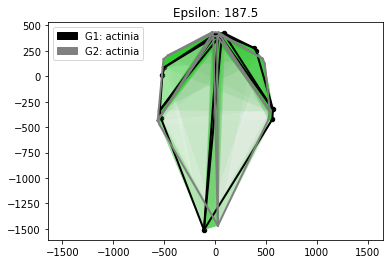

In [5]:
visual = Visualize(graph_1, graph_2, epsilon=epsilon)
visual.plot_freespace()

### Comparing distances across 1 class. 

In [6]:
actinia_df = df[df['species'] == 'actinia']

actinia_graphs = list()
for index, row in actinia_df.head(50).iterrows():
    graph = observation_to_graph(row)
    actinia_graphs.append(graph)

sample_actinia = actinia_graphs.pop()

actinia_df.head()

,species,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y11,x12,y12,x13,y13,x14,y14,x15,y15,species_classes
0,actinia,1.939415,414.812913,-7.047279,385.719915,28.429685,371.115922,65.726986,378.318652,99.227324,...,-1510.662028,563.252807,-424.176777,570.669793,-326.497673,405.345149,249.386171,381.749535,279.209462,4
1,actinia,-27.972095,433.154746,-27.127051,417.953521,-17.138482,393.213241,21.438983,394.733759,42.800256,...,-1468.443026,525.022693,-425.378430,538.426886,-343.900676,489.936964,124.340189,467.627131,173.870135,4
2,actinia,-43.242816,430.053913,-39.277936,409.976781,-34.239161,376.468073,4.770596,377.631881,19.758407,...,-1462.301694,546.694706,-517.910591,557.727421,-406.283139,488.911001,155.339518,460.348932,210.137903,4
3,actinia,-36.082509,416.832663,-30.527203,394.236217,-19.829324,359.869763,13.246641,361.064598,25.471213,...,-1385.313503,535.019483,-519.980964,617.977373,-346.868643,517.511348,207.452944,483.026127,261.141674,4
4,actinia,-7.724386,362.852233,-18.024917,347.266408,-16.965580,316.096657,18.166718,313.986527,26.485501,...,-1493.947554,572.248040,-473.575088,591.964194,-391.158971,440.811250,275.545461,392.206108,308.648330,4


min index: 18 min value: 125.0


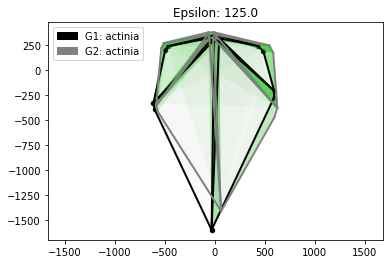

max index: 19 max value: 585.9375


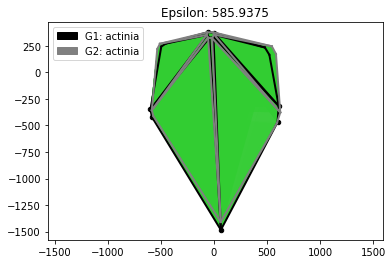

In [7]:
epsilons = list(map(lambda g: BinarySearch(g, sample_actinia, left=0, right=1000, precision=10).search(), actinia_graphs))

# min case
min_epsilon = min(epsilons)
index = epsilons.index(min_epsilon)
print("min index:", index, "min value:", min_epsilon)
visual = Visualize(actinia_graphs[index], sample_actinia, epsilon=min_epsilon)
visual.plot_freespace()

# max case
max_epsilon = max(epsilons)
index = epsilons.index(max_epsilon)
print("max index:", index, "max value:", max_epsilon)
visual = Visualize(actinia_graphs[index], sample_actinia, epsilon=max_epsilon)
visual.plot_freespace()

### Comparing Distances across 2 classes.

In [8]:
def cross_search(graph): 
    epsilon_1 = BinarySearch(graph, sample_actinia, left=0, right=1000, precision=10).search()
    epsilon_2 = BinarySearch(sample_actinia, graph, left=0, right=1000, precision=10).search()
    return (epsilon_1, epsilon_2)

def matrix_search(graphs_n, graphs_m):
    epsilons = list()
    for graph_m in graphs_m:
        epsilons.append(list())
        for graph_n in graphs_n:
            epsilon = BinarySearch(graph_m, graph_n, left=0, right=1000, precision=10).search()
            epsilons.append(epsilon)

def scatter_plot(coordinates_1, coordinates_2, label_1, label_2):
    x_values, y_values = zip(*coordinates_1)
    plt.scatter(x_values, y_values, c='blue', marker='o', label=label_1, alpha=0.7)
    
    x_values, y_values = zip(*coordinates_2)
    plt.scatter(x_values, y_values, c='red', marker='o', label=label_2, alpha=0.7)   

    plt.xlabel('Sample Graph Traverse')
    plt.ylabel('N Graph Traverse')
    plt.title('Traversal Distances')
    #plt.xlim(0, 400)
    #plt.ylim(0, 400)

    plt.legend()
    plt.show()
    

In [9]:
cristalina_df = df[df['species'] == 'cristalina']

cristalina_graphs = list()
for index, row in cristalina_df.head(50).iterrows():
    graph = observation_to_graph(row)
    cristalina_graphs.append(graph)

cristalina_df.head()

,species,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y11,x12,y12,x13,y13,x14,y14,x15,y15,species_classes
721,cristalina,-58.074505,472.833983,-54.957343,458.685118,-54.761053,332.070151,8.400559,354.106152,26.786612,...,-1684.362482,385.490462,-387.814131,389.117307,-296.322919,377.869008,72.217360,369.612759,132.537526,6
722,cristalina,-20.085394,457.233744,-17.285529,446.460576,-15.382377,404.208269,33.364632,391.287861,44.372189,...,-1633.403925,435.994339,-275.536227,442.244209,-178.446120,430.552349,-11.581961,425.109523,52.260702,6
723,cristalina,37.455691,411.934557,34.776031,401.586076,17.514195,316.602597,71.705972,365.750342,87.591319,...,-1605.585134,466.716136,-241.548478,464.726508,-54.104794,456.161369,85.405153,448.293835,143.174165,6
724,cristalina,-42.409869,448.774765,-42.020382,441.649343,-37.267868,383.825975,-10.238816,401.082962,-7.394895,...,-1541.075892,495.112682,-411.352066,508.457030,-225.164975,493.049269,-42.615450,481.735329,58.965018,6
725,cristalina,-15.724062,504.593473,-14.044497,491.998845,-18.530350,340.052220,7.293611,400.989351,10.562439,...,-1495.447264,441.177553,-348.150916,467.012304,-210.681452,474.989967,-68.739819,476.966479,24.934603,6


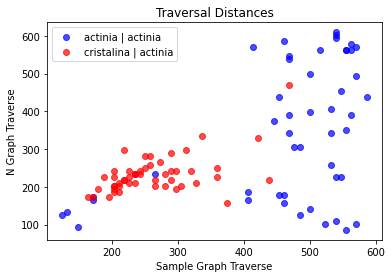

In [10]:
actinia_epsilons = list(map(cross_search, actinia_graphs))
cristalina_epsilons = list(map(cross_search, cristalina_graphs))
scatter_plot(actinia_epsilons, cristalina_epsilons, 'actinia | actinia', 'cristalina | actinia')